<a href="https://colab.research.google.com/github/Labani4321/Data-Science/blob/main/Alternate_Solution_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Credit Card Fraud Detection
This project is related to building a Machine Learning module that can effectively detect Fraudlent Credit Card transactions and hence save money for the client Bank.

In [9]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There are two datasets hosted by kaggle named test and train. Lets examine both the datasets to decide if they needs to be merged or if it is a good idea to keep the test dataset seperate for final evaluation.

In [12]:
# Importing both the datasets provided by kaggle
#fraud = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTrain.csv')
#fraud_test = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTest.csv')
fraud = pd.read_csv('fraudTrain.csv')
fraud_test = pd.read_csv('fraudTest.csv')

### Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Data Cleaning
- Outlier Treatment
- Variable Transformation

In [13]:
# check for the main (training) dataset
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [14]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35041 non-null  int64  
 1   trans_date_trans_time  35041 non-null  object 
 2   cc_num                 35041 non-null  int64  
 3   merchant               35041 non-null  object 
 4   category               35041 non-null  object 
 5   amt                    35041 non-null  float64
 6   first                  35041 non-null  object 
 7   last                   35041 non-null  object 
 8   gender                 35041 non-null  object 
 9   street                 35041 non-null  object 
 10  city                   35041 non-null  object 
 11  state                  35041 non-null  object 
 12  zip                    35041 non-null  int64  
 13  lat                    35041 non-null  float64
 14  long                   35041 non-null  float64
 15  ci

In [15]:
# basic inspection of the test dataset
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42783 entries, 0 to 42782
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42783 non-null  int64  
 1   trans_date_trans_time  42783 non-null  object 
 2   cc_num                 42783 non-null  int64  
 3   merchant               42783 non-null  object 
 4   category               42783 non-null  object 
 5   amt                    42783 non-null  float64
 6   first                  42783 non-null  object 
 7   last                   42783 non-null  object 
 8   gender                 42783 non-null  object 
 9   street                 42783 non-null  object 
 10  city                   42783 non-null  object 
 11  state                  42783 non-null  object 
 12  zip                    42783 non-null  int64  
 13  lat                    42783 non-null  float64
 14  long                   42783 non-null  float64
 15  ci

In [16]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353

- 70% data is present in the train dataset and remaining 30% in the test dataset.
- No null values in either of the files

In [17]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

,proportion
is_fraud,
0.0,0.989926
1.0,0.010074


Fraud Distribution
is_fraud
0.0    0.989926
1.0    0.010074
Name: proportion, dtype: float64


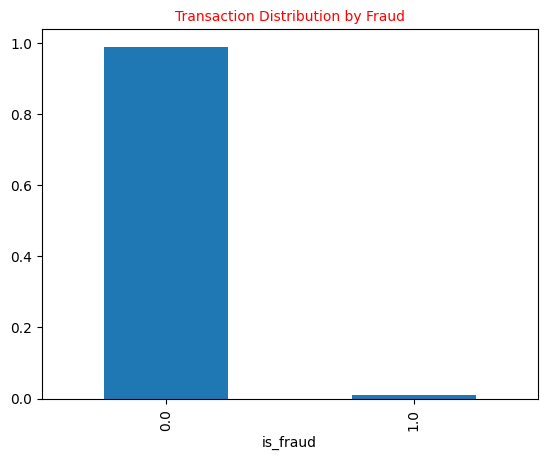

In [18]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [19]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

,proportion
is_fraud,
0.0,0.995699
1.0,0.004301


Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

### Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned. Hence, dropping them:-
- cc_num
- first
- last
- street
- trans_num

In [20]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [21]:
# Inspecting the fraud dataset
fraud.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0.0


In [26]:
# Inspecting the fraud test dataset
fraud_test.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1.371817e+09,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1.371817e+09,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1.371817e+09,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1.371817e+09,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1.371817e+09,44.959148,-85.884734,0.0


In [27]:
# Converting dob to age
from datetime import date
fraud['dob'] = pd.to_datetime(fraud['dob'])
fraud['age'] = (pd.to_datetime('now') - fraud['dob'])/ np.timedelta64(1, 'Y')

fraud.drop(['dob'], axis=1, inplace=True)
fraud.head()

ValueError: Unit Y is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [ ]:
# Same change on the test dataset
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob'])/ np.timedelta64(1, 'Y')

fraud_test.drop(['dob'], axis=1, inplace=True)
fraud_test.head()

In [ ]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

In [ ]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

In [ ]:
# Check on numeric columns for outliers
fraud.describe()

In [ ]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [ ]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

In [ ]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

In [ ]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

### Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [ ]:
fraud.info()

In [ ]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [ ]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

In [ ]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

In [ ]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [ ]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [ ]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [ ]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

In [ ]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [ ]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

In [ ]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [ ]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

In [ ]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
fraud_perc.sort_values(ascending=False).head()

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [ ]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [ ]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

There seems certain jobs that have real high % of fraud transactions.

In [ ]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

In [ ]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

In [ ]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

In [ ]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [ ]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

As is evident from above stats, there are perticular ZIP codes that have 100% frauds.

In [ ]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [ ]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

In [ ]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

In [ ]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

- There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
- Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model.

In [ ]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet.
Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [ ]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

In [ ]:
print ('Total number of months: ', date.value_counts().size)

In [ ]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

In [ ]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

In [ ]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

In [ ]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

In [ ]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

In [ ]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

In [ ]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [ ]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [ ]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

In [ ]:
fraud.info()

In [ ]:
fraud_test.info()

### Train Test Split
Splitting the data into train & validate datasets. The test dataset provided will be used for final evaluation.

In [ ]:
X = fraud.drop('is_fraud', axis=1)
X.head()

In [ ]:
y = fraud['is_fraud']
y.head()

In [ ]:
# Splitting the data into train and test such that ration of fraud is same in both
from sklearn.model_selection import train_test_split

# Handle missing values in 'y' before splitting
y = fraud['is_fraud'].dropna()  # Drop rows with NaN in 'is_fraud' column

# Update X to match the rows in the modified y
X = fraud.loc[y.index].drop('is_fraud', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

In [ ]:
# Inspecting the train and test datasets
print ('Train Dataset : ', X_train.shape)
print ('Test Dataset : ', X_test.shape)

In [ ]:
# Creating X_final & y_final from the test dataset provided by Kaggle. This will be used for final evaluation of the model
X_final = fraud_test.drop('is_fraud', axis=1)
y_final = fraud_test['is_fraud']


### Data Scaling

In [ ]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

In [ ]:
X_train.describe()

In [ ]:
# Identify the variables to be scaled
vars_to_scale = ['merchant', 'category', 'amt', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age', 'trans_date', 'trans_time']

In [ ]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [ ]:
# Scaling
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale])
X_final[vars_to_scale] = scaler.transform(X_final[vars_to_scale])
X_train.describe()

In [ ]:
# Inspection after scaling
X_test.describe()

In [ ]:
# Inspection after scaling
X_final.describe()

In [ ]:
# Lets check the distribution after scaling
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

Quite evident that post scaling Skewness in data has been handles and date is more normally distributed.

### Logistic Regression Model
Lets start with a Basic Logistic Regression Model and check its Stats.

In [ ]:
# Let's examine any correlation in variables and remove variables with high correlation
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [ ]:
# There is high correlation between variables long, merch_long and zip. Similarly merch_lat has high correlation with lat.
# This correlation will impact Linear Regression model but will be fine for other models. Hence, creating a different train & test dataframe for LR after dropping 'long', 'merch_long', 'merch_lat'.
X_train_lr = X_train.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_test_lr = X_test.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_final_lr = X_final.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_train_lr.head()

In [ ]:
# Let's examine the correlation in variables again
plt.figure(figsize = (15,15))
sns.heatmap(X_train_lr.corr(), annot=True)
plt.show()

In [ ]:
# Inspecting the dataset
print(X_train_lr.shape)
print(X_test_lr.shape)
print(X_final_lr.shape)

In [ ]:
# Function to draw ROC curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Function to return various standard metrices for a model
def model_metrics(a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Pricision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print(confusion)

  return None

In [ ]:
# Function to calculate the train-test stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost_train_test(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = 0
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None

  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [ ]:
# Function to calculate the overall stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = confusion_matrix(y_final, y_final_pred)     # cm3 is confusion matrix of model on final dataset
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None

  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [ ]:
# Logistic regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_lr)
lr_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr = lr_model.fit()

In [ ]:
# Threshold of 0.5 is arbitrarily taken. Since, this is just a base model, we will evaluate threshold at a later stage.
y_train_pred = lr.predict(X_train_sm)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
draw_roc(y_train, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

- This model has a very high accuracy of 99% but is still not able to detedct any of the Fraud (True Positive). Reason being the data is highly imbalanced.
- Lets handle data imbalance before moving. We will use the following techinques:-
 - Random Under Sampling
 - Random Over Sampling
 - SMOTE
 - ADASYN

In [ ]:
# Address imbalance using under sampling
from imblearn import under_sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train_lr, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

In [ ]:
# Logistic Regression Model
X_train_us = sm.add_constant(X_train_us)
lr_model = sm.GLM(y_train_us ,X_train_us, family = sm.families.Binomial())
lr_us = lr_model.fit()

In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_us.predict(X_train_us)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_us, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Address imbalance using over sampling
from imblearn import over_sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train_lr, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

In [ ]:
# Logistic Regression Model
X_train_ro = sm.add_constant(X_train_ro)
lr_model = sm.GLM(y_train_ro ,X_train_ro, family = sm.families.Binomial())
lr_ro = lr_model.fit()

In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ro.predict(X_train_ro)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ro, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Address imbalance using ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train_lr, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

In [ ]:
# Logistic Regression Model
X_train_ada = sm.add_constant(X_train_ada)
lr_model = sm.GLM(y_train_ada ,X_train_ada, family = sm.families.Binomial())
lr_ada = lr_model.fit()

In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ada.predict(X_train_ada)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ada, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Address imbalance using SMOTE
from imblearn import over_sampling
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train_lr, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

In [ ]:
# Logistic Regression Model
X_train_smte = sm.add_constant(X_train_smte)
lr_model = sm.GLM(y_train_smte ,X_train_smte, family = sm.families.Binomial())
lr_smte = lr_model.fit()
X_train_smte.shape

In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

Based on the train mertices the model created on the SMOTE and Over Sampled data is slightly better than the rest. Lets evaluate the model created on SMOTE.

In [ ]:
# Summary of LR model created on data cured for imbalance using SMOTE
lr_smte.summary()

In [ ]:
# Check the VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_smte.columns
vif['VIF'] = [variance_inflation_factor(X_train_smte.values, i) for i in range(X_train_smte.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

VIF of all the variables is under 5 and hence no major correlation among variables. Also, the P value of all variables is low. Hence, we can consider this as a final model.

In [ ]:
# Getting the predicted values on the train set
y_train_pred = lr_smte.predict(X_train_smte)

In [ ]:
# Lets have a dataset with only the index, is_fraud and predicted is_fraud fields
lr_fraud_final = pd.DataFrame({'Fraud Index': y_train_smte.index, 'is_fraud':y_train_smte.values, 'is_fraud_Prob':y_train_pred})
lr_fraud_final.reset_index(drop=True, inplace=True)
lr_fraud_final.head()

In [ ]:
# To find the optimum cutoff, let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr_fraud_final[i]= lr_fraud_final.is_fraud_Prob.map(lambda x: 1 if x > i else 0)
lr_fraud_final.head()

In [ ]:
# Printing confusion matrix at various cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec', 'prec', 'recall'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(lr_fraud_final.is_fraud, lr_fraud_final[i] )
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TN + TP)/ (TN + TP + FP + FN)
    sens = TP/ (FN + TP)
    spec = TN/ (TN + FP)
    prec = TP/ (TP + FP)
    recall = TP/ (TP + FN)
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec, prec, recall]
print(cutoff_df)

In [ ]:
# Let's plot accuracy precision and recall for various probabilities.
# Recall ensures we have good TP while precision keeps a check on FN
cutoff_df.plot.line(x='prob', y=['accuracy','prec','recall'])
plt.show()

In [ ]:
# Turn-out that 0.5 is optimum cut-off. Let's pull the stats for train & test datasets
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
X_test_lr = sm.add_constant(X_test_lr)
y_test_pred = lr_smte.predict(X_test_lr)
y_test_pred = y_test_pred.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# Model Metrices on training dataset
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [ ]:
# Model Metrices on test dataset
draw_roc(y_test, y_test_pred)
print ('AUC for the LR Model', metrics.roc_auc_score(y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

So the basic Regression model has a moderate AUC, Accuracy & Recall but a very low Precision.

### Descision Tree
Lets create a decision tree with all default parameters with Tree Depth set to 10 to control the size of tree for SMOTE and ADASYN train datasets. But before that, lets create dataset for various imbalances techinques that we will be using going forward.
Since Decision Trees, XGBOOST & Random Forest are not impacted by correlations among the variables. We will restore the dataset to all the final variables that were scaled.
It was noticed that the models build on the dataset with reduced columns were less effective overall.

In [ ]:
X_train.shape

In [ ]:
# Dataset for Under Sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

In [ ]:
# Dataset for Over Sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

In [ ]:
# Dataset for SMOTE
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

In [ ]:
# Dataset for ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

In [ ]:
# Function to create Decision Tree image
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
#import pydotplus

# function to print the decision graph
#def get_dt_graph(dt_classifier):
#    dot_data = StringIO()
#    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
#                    feature_names=X.columns,
#                    class_names=['Fraud', "Not Fraud"])
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#    return graph

In [ ]:
# Decision Tree Model with default parameters and under sampled train data
from sklearn.tree import DecisionTreeClassifier
dt_us = DecisionTreeClassifier(max_depth=10)
dt_us.fit(X_train_us, y_train_us)
y_train_pred = dt_us.predict(X_train_us)
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Decision Graph for the above model
#gph = get_dt_graph(dt_us)
#Image(gph.create_png())

In [ ]:
# Decision Tree Model with default parameters and over sampled train data
dt_ro = DecisionTreeClassifier(max_depth=10)
dt_ro.fit(X_train_ro, y_train_ro)
y_train_pred = dt_ro.predict(X_train_ro)
y_test_pred = dt_ro.predict(X_test)
draw_roc(y_train_ro, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
#gph = get_dt_graph(dt_ro)
#Image(gph.create_png())

In [ ]:
# Decision Tree Model with default parameters and SMOTE train data
dt_smte = DecisionTreeClassifier(max_depth=10)
dt_smte.fit(X_train_smte, y_train_smte)
y_train_pred = dt_smte.predict(X_train_smte)
y_test_pred = dt_smte.predict(X_test)
draw_roc(y_train_smte, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Decision Tree Model with default parameters and ADASYN train data
dt_ada = DecisionTreeClassifier(max_depth=10)
dt_ada.fit(X_train_ada, y_train_ada)
y_train_pred = dt_ada.predict(X_train_ada)
y_test_pred = dt_ada.predict(X_test)
draw_roc(y_train_ada, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

Based on the AUC, cost and other metrices, Decision Tree created on undersampled data seems to be more accurate that rest of the models. Lets create a dataset to store all the important features of a model.

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
model_selector_tt = pd.DataFrame( columns = ['model', 'FP','FN','TP','Cost', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
                                          'ROC - Train', 'ROC - Test', 'ROC - Final'])
c = cost_train_test(dt_us, 1)
model_selector_tt.loc[0] = ['DT - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_ro, 1)
model_selector_tt.loc[1] = ['DT - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_smte, 1)
model_selector_tt.loc[2] = ['DT - SMOTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_ada, 1)
model_selector_tt.loc[3] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
model_selector = pd.DataFrame( columns = ['model', 'FP','FN','TP','Cost', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
                                          'ROC - Train', 'ROC - Test', 'ROC - Final'])
c = cost(dt_us, 1)
model_selector.loc[0] = ['DT - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_ro, 1)
model_selector.loc[1] = ['DT - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_smte, 1)
model_selector.loc[2] = ['DT - SMOTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_ada, 1)
model_selector.loc[3] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

- Let's use the GridSearch CV method to test various parameters on the best model till now.
- Also let's define a new metric/ score for model evaluation. This is based on cost of the model. Lower the cost, better its rank.

In [ ]:
# Lets define a new custom score to be used for various Grid Search CV models. Instead of using Accuracy or Precision,
# we will directly use the cost of model. Lower the cose, better the rating.
# This way we will reduce score for False Negatives as well as False Posotoves.
from sklearn.metrics import make_scorer

# Function to calculate Monthly cost of the model
def my_score(a, p):
  cm = confusion_matrix(a, p)
  TP = cm[1,1] # true positive
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = c1 + c2

  return c3

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter Grid to be tested
params = {
    'max_depth': [6, 8, 10],
    'max_features': [8, 12, 14, 17],
    'class_weight': ['balanced'],
    'min_samples_leaf': [50, 100, 500, 750],
    'random_state':[0, 21, 42, 63, 100]
}
dt = DecisionTreeClassifier()

In [ ]:
# Instantiate the grid search model
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_dt_us = GridSearchCV(estimator=dt,
                                  param_grid=params,
                                  cv=3, n_jobs=-1, verbose=2, scoring = my_scorer)

In [ ]:
# Fitting the data as per the grid defined
grid_search_dt_us.fit(X_train_us, y_train_us)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_dt_us.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

In [ ]:
# Getting the best model based on the score
dt_best = grid_search_dt_us.best_estimator_
dt_best

In [ ]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[4] = ['DT - Grid Search US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# getting the cost of overall model
c = cost(dt_best, 1)
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
model_selector.loc[4] = ['DT - Grid Search US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBOOST estimator on Undersampled data
xgb_us = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=100)
xgb_us.fit(X_train_us, y_train_us)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_us, 1)
model_selector_tt.loc[5] = ['XGB - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_us, 1)
model_selector.loc[5] = ['XGB - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# XGBOOST estimator on Oversampled data
xgb_ro = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ro, 1)
model_selector_tt.loc[6] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ro, 1)
model_selector.loc[6] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# XGBOOST estimator on SMOTE
xgb_smte = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_smte.fit(X_train_smte, y_train_smte)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_smte, 1)
model_selector_tt.loc[7] = ['XGB - Smote - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_smte, 1)
model_selector.loc[7] = ['XGB - Smote - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# XGBOOST estimator on ADASYN
xgb_ada = XGBClassifier(loss = 'exponential', max_depth=8, n_estimators = 10, max_features = 14, random_state=63)
xgb_ada.fit(X_train_ada, y_train_ada)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ada, 1)
model_selector_tt.loc[8] = ['XGB - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ada, 1)
model_selector.loc[8] = ['XGB - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

XGBOOST seems to have reduced the count of False Positives and cost better than Decision tree. It has also increased the count of True Positives. Among various models of XGBOOST, the one on over sampled data seems best. Lets try GridSearch CV to test various parameters on random oversampled data.

In [ ]:
params = {
    'learning_rate': [0.1, 0.5, 0.9],
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [14],
    'class_weight': ['balanced']
}

In [ ]:
# XGB - GridSearch CV on Oversampled data
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro,
                                    param_grid=params,
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [ ]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

In [ ]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[9] = ['XGB - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(dt_best, 1)
model_selector.loc[9] = ['XGB - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Checking the best parameters derived for XGB on under sampled data
xgb_us = XGBClassifier(learning_rate=0.7, max_depth=10, n_estimators=20)
xgb_us.fit(X_train_us, y_train_us)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

This is very interesting. The model seems to have worked perfectly.Lets check its performance on test datasets.

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Train Test stats of the model
c = cost_train_test(xgb_us, 0)

In [ ]:
# Overall stats for the model
c = cost(xgb_us, 0)

The model has worked well to identify true positives. However, a lot of transactions were incorrectly classified as Fraud.This happened because undersampling removed non fraud data to balance the data.

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_us, 1)
model_selector_tt.loc[10] = ['XGB - US - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_us, 1)
model_selector.loc[10] = ['XGB - US - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Slight modification in best parameters for Over Sampled Data
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ro, 1)
model_selector_tt.loc[11] = ['XGB - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ro, 1)
model_selector.loc[11] = ['XGB - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Checking the best parameters derived for XGB on SMOTE data
xgb_smte = XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)
xgb_smte.fit(X_train_smte, y_train_smte)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_smte, 1)
model_selector_tt.loc[12] = ['XGB - SMTE - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_smte, 1)
model_selector.loc[12] = ['XGB - SMTE - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Checking the best parameters derived for XGB on ADASYN data
xgb_ada = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators = 15, max_features = 14)
xgb_ada.fit(X_train_ada, y_train_ada)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ada, 1)
model_selector_tt.loc[13] = ['XGB - ADA - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ada, 1)
model_selector.loc[13] = ['XGB - ADA - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Will start from the feature values that worked best till now
# Random Forest on Under Sampled data
rf_us = RandomForestClassifier(n_estimators=20, max_depth=10, bootstrap=True, oob_score=True, n_jobs=-1)
rf_us.fit(X_train_us, y_train_us)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_us, 1)
model_selector_tt.loc[14] = ['RF - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_us, 1)
model_selector.loc[14] = ['RF - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Random Forest on Over Sampled data
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=10, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=0)
rf_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ro, 1)
model_selector_tt.loc[15] = ['RF - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ro, 1)
model_selector.loc[15] = ['RF - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Random Forest on SMOTE data
rf_smte = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_smte.fit(X_train_smte, y_train_smte)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_smte, 1)
model_selector_tt.loc[16] = ['RF - SMTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_smte, 1)
model_selector.loc[16] = ['RF - SMTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Random Forest on ADASYN data
rf_ada = RandomForestClassifier(n_estimators=15, max_depth=10, max_features = 14, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_ada.fit(X_train_ada, y_train_ada)


In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ada, 1)
model_selector_tt.loc[17] = ['RF - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ada, 1)
model_selector.loc[17] = ['RF - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Parameter tuining using GridSearch CV
params = {
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [12, 14],
#    'min_samples_split': [50, 100],
#    'min_samples_leaf':  [50, 100],
#    'max_leaf_nodes': [200, 250, 300],
    'random_state':[21, 41]
}

In [ ]:
# Random Forest with GridSearch CV on Over Sampled data
rf_ro = RandomForestClassifier()
y_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_rf_ro = GridSearchCV(estimator=rf_ro,
                                    param_grid=params,
                                    cv=2, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_rf_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_rf_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

In [ ]:
# Getting the best model based on the score
dt_best = grid_search_rf_ro.best_estimator_
dt_best

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[18] = ['RF - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(dt_best, 1)
model_selector.loc[18] = ['RF - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

In [ ]:
# Slight modifications on the best parameters obtained
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 10, random_state=42, bootstrap=True, oob_score=True, n_jobs=-1)
rf_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ro, 1)
model_selector_tt.loc[19] = ['RF - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

In [ ]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ro, 1)
model_selector.loc[19] = ['RF - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

### Model Selection
- Now that we have multiple models ranging in recall, precision & cost; let's try to pick the one which is best.
- The best model for our case will be the one which identifies maximum Frauds (high TP), leaves very less Frauds undetected (low FN) and less incorrectly identified frauds (less FP).
- Based on the above, we will use the metrices of Precision and Recall and also the custom metric for Price to pick the best suited model.
- Higher recall will ensure that the model allowed very few actual fraud cases let go. Most of them were captured.
- High precision would ensure we only identify actual frauds as fraud. Identifying a legitimate transaction as fraud would lower the precision. However, there is a trade-off between Precision & Recall and hence we compromised a bit on Precision to get better Recall.

In [ ]:
# Top train-test models in terms of Precision
best_prec_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55)]
best_prec_tt.sort_values(['Precision'], ascending=False)

In [ ]:
# Top train-test models in terms of Recall
best_recall_tt = model_selector_tt[(model_selector_tt.Recall >= 0.97)]
best_recall_tt.sort_values(['Recall'], ascending=False)

Based on the train-test metrices, only model 11 (XGB - RO - 2) seems to have high recall & precision. Lets see the same lists for overall metrices.

In [ ]:
# Top overall models in terms of Precision
best_prec = model_selector[(model_selector.Precision >= 0.50)]
best_prec.sort_values(['Precision'], ascending=False)

In [ ]:
# Top overall models in terms of Recall
best_recall = model_selector[(model_selector.Recall >= 0.95)]
best_recall.sort_values(['Recall'], ascending=False)

- Clearly for model 11 (XGB - RO - 2), the overall ranking in terms of recall has fallen but it is still the top model to have both - high Precision and Recall. Rest of the models seems to trade-off one metric for other.
- There are models with better Precision or better Recall than this model, but this one seems best when we see both these measures.
- Let's define a cutoff of Precision and Recall to see how many models qualify both.

In [ ]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55) & (model_selector_tt.Recall >=.95)]
best_tt

In [ ]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_overall = model_selector[(model_selector.Precision >= 0.55) & (model_selector.Recall >=.95)]
best_overall

While there are couple of models with both high recall and precision during TRIAN-Test, only model 11 (XGB - RO - 2) has retained it overall.

In [ ]:
# Scaling the cost field & keeping only the most needed measures. We have only selected high Accuracy and ROC models. Hence, dropping thoese 2 fields also.
model_selector['cost_scaled'] = model_selector['Cost']/100000

In [ ]:
# Check the relation between Cost and False Positive cases (we want both to be less)
plt.figure(figsize = (15,5))
plt.title('Cost Vs False Positives')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Cost, 'g')
plt.plot(model_selector.FP, 'r')
plt.show()

Based on above graph, model 11 (XGB - RO - 2) seems to do justice with Cost Vs FP comparison also.

In [ ]:
# Check the relation between Precision and Recall
plt.figure(figsize = (15,5))
plt.title('Precision Vs Recall')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Precision, 'g')
plt.plot(model_selector.Recall/2, 'r')
plt.show()

- Based on the above analysis, model 'XGB - RO - 2' seems to be best suited for the job. It has low incorrect fraud tagging and still not so high cost. It also has comparative Precision and Recall.
- Let's try some more modification to see if we can get even better.

In [ ]:
# Parameter grid for GridSearch CV method
params = {
    'learning_rate': [0.5],
    'max_depth': [10],
    'n_estimators': [15],
    'max_features': [14],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 15]
#    'random_state': [41, 63],
}

In [ ]:
# XGB on Over Sampled data with parameter tuining
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro,
                                    param_grid=params,
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [ ]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

In [ ]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

In [ ]:
# Train-Test Metrices
c = cost_train_test(dt_best, 0)

In [ ]:
# Overall Metrices
c = cost(dt_best, 0)

Even with hyper parameter tuining the result remains the same So, we will finalize the model 11.

### Final Model

In [ ]:
# four best models that balances TP, FP, FN and Cost
final_models = model_selector[(model_selector.index == 9) |
                              (model_selector.index == 10) |
                              (model_selector.index == 11) |
                              (model_selector.index == 13)
                              ]
final_models

Out of the four best models, 'XGB - RO - 2' keeps the true positive comparatively high while keeping a check on false negatives (missed frauds). The model also keeps a tab on incorrectly identified frauds. In process the cost is also comparable. Hence, this is the model to be recommended.

A quick recap of the final model

In [ ]:
# Final Model
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

In [ ]:
# Model performance on train data
y_train_pred = xgb_ro.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Model performance on test data
y_test_pred = xgb_ro.predict(X_test)
draw_roc(y_test, y_test_pred)
model_metrics(y_test, y_test_pred)

In [ ]:
# Model performance on final data
y_final_pred = xgb_ro.predict(X_final)
draw_roc(y_final, y_final_pred)
model_metrics(y_final, y_final_pred)

In [ ]:
# Extracting the features significance
imp_df = pd.DataFrame({
    "Varname": X_train_smte.columns,
    "Imp": xgb_ro.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
# Finally the financials of this model
c = cost(xgb_ro, 0)